In [1]:
import pandas as pd
import yfinance as yf
import lxml
import numpy as np

print(pd.__version__, yf.__version__)

1.1.3 0.1.54


In [2]:
symbols = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER', 'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'SMH', 'SPXL', 'IVV', 'VNQ', 'VCSH', 'SLQD', 'MCHI', 'USO']

In [3]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = ' '.join(symbols),

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "90d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  19 of 19 completed


In [4]:
data

AMZN                                                  \
                   Open         High          Low        Close   Volume   
Date                                                                      
2020-06-03  2468.010010  2488.000000  2461.169922  2478.399902  2671000   
2020-06-04  2477.429932  2507.540039  2450.010010  2460.600098  2948700   
2020-06-05  2444.510010  2488.649902  2437.129883  2483.000000  3306400   
2020-06-08  2500.199951  2530.000000  2487.340088  2524.060059  3970700   
2020-06-09  2529.439941  2626.429932  2525.000000  2600.860107  5176000   
...                 ...          ...          ...          ...      ...   
2020-10-02  3153.629883  3195.800049  3123.000000  3125.000000  5613100   
2020-10-05  3145.840088  3202.530029  3140.850098  3199.199951  3775300   
2020-10-06  3165.000000  3182.000000  3090.000000  3099.959961  5086900   
2020-10-07  3135.000000  3200.000000  3132.389893  3195.689941  4309400   
2020-10-08  3224.989990  3233.290039  3174.989990  3190.550049  3166700   

                  UAL                                              ...  \
                 Open       High        Low      Close     Volume  ...   
Date                                                               ...   
2020-06-03  30.750000  33.900002  30.389999  33.650002   85543700  ...   
2020-06-04  35.770000  39.849998  34.139999  39.099998  142812800  ...   
2020-06-05  48.950001  48.950001  41.259998  42.410000  135585100  ...   
2020-06-08  45.860001  48.849998  44.570000  48.689999   89957300  ...   
2020-06-09  45.000000  46.099998  41.500000  44.639999   79612800  ...   
...               ...        ...        ...        ...        ...  ...   
2020-10-02  33.360001  36.770000  33.270000  36.009998   35081000  ...   
2020-10-05  36.430000  36.580002  35.419998  36.200001   18046400  ...   
2020-10-06  36.730000  37.090000  34.840000  34.880001   28719000  ...   
2020-10-07  36.509998  37.220001  35.880001  36.380001   27677300  ...   
2020-10-08  37.160000  37.689999  35.849998  37.000000   28252300  ...   

                   SMH                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2020-06-03  145.770004  148.139999  145.759995  147.550003  4493800   
2020-06-04  146.889999  150.179993  146.699997  149.179993  3140800   
2020-06-05  152.330002  154.770004  152.149994  152.699997  4896800   
2020-06-08  153.389999  153.440002  149.460007  152.240005  2781100   
2020-06-09  150.570007  153.089996  150.070007  152.520004  2863000   
...                ...         ...         ...         ...      ...   
2020-10-02  174.529999  176.949997  173.080002  173.149994  3139300   
2020-10-05  174.789993  179.050003  174.649994  179.050003  1916100   
2020-10-06  178.619995  181.610001  176.779999  177.479996  5250100   
2020-10-07  180.160004  181.770004  180.119995  181.279999  1733800   
2020-10-08  183.240005  183.740005  182.360001  183.500000  1884500   

                  AAPL                                                 
                  Open        High         Low       Close     Volume  
Date                                                                   
2020-06-03   81.018922   81.403231   80.429980   81.133713  104491200  
2020-06-04   80.951545   81.258487   80.050665   80.434975   87560400  
2020-06-05   80.692014   82.788233   80.662069   82.725845  137250400  
2020-06-08   82.413905   83.249899   81.682725   83.214958   95654400  
2020-06-09   82.885558   86.246990   82.853115   85.842720  147712400  
...                ...         ...         ...         ...        ...  
2020-10-02  112.889999  115.370003  112.220001  113.019997  144712000  
2020-10-05  113.910004  116.650002  113.550003  116.500000  106243800  
2020-10-06  115.699997  116.120003  112.250000  113.160004  161498200  
2020-10-07  114.620003  115.550003  114.129997  115.080002   96849000  


In [5]:
data_closing = data.xs('Close',level = 1, axis = 1)
# data_ohlc = (data.xs('Open',level = 1, axis = 1) +
#              data.xs('High',level = 1, axis = 1) +
#              data.xs('Low',level = 1, axis = 1) +
#              data.xs('Close',level = 1, axis = 1)) / 4
data_closing['CASH'] = 1
data_closing

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AMZN,UAL,FB,MCHI,XOM,VCSH,USO,MSFT,IVV,UBER,GOOGL,SLQD,VNQ,BA,SPXL,AAL,DAL,SMH,AAPL,CASH
Date,,,,,,,,,,,,,,,,,,,,
2020-06-03,2478.399902,33.650002,230.160004,64.090919,48.287392,81.492645,27.120001,184.913010,310.684265,36.750000,1439.250000,51.463688,80.984253,173.160004,43.753078,11.850000,28.469999,147.550003,81.133713,1
2020-06-04,2460.600098,39.099998,226.289993,63.373596,48.150097,81.433067,27.500000,182.478882,309.643311,36.430000,1414.300049,51.523239,80.178535,184.300003,43.383476,16.719999,32.380001,149.179993,80.434975,1
2020-06-05,2483.000000,42.410000,230.770004,64.459541,52.053104,81.552216,28.870001,186.748566,317.713074,37.209999,1440.020020,51.453762,83.214714,205.429993,46.719898,18.590000,34.160000,152.699997,82.725845,1
2020-06-08,2524.060059,48.689999,231.399994,64.280212,53.680988,81.582001,28.370001,187.905777,321.599182,37.080002,1448.040039,51.483540,85.278130,230.500000,48.428062,20.309999,36.970001,152.240005,83.214958,1
2020-06-09,2600.860107,44.639999,238.669998,64.200516,52.484589,81.582001,28.420000,189.342300,319.229858,36.590000,1452.079956,51.533161,83.863213,216.740005,47.369198,18.549999,34.169998,152.520004,85.842720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,3125.000000,36.009998,259.940002,73.989998,32.980000,82.790001,26.350000,206.190002,335.049988,37.720001,1455.599976,52.029999,81.930000,168.080002,52.180000,13.000000,31.750000,173.149994,113.019997,1
2020-10-05,3199.199951,36.200001,264.649994,74.389999,33.740002,82.779999,27.930000,210.380005,340.899994,37.139999,1482.829956,52.040001,82.400002,171.199997,54.849998,13.120000,32.000000,179.050003,116.500000,1
2020-10-06,3099.959961,34.880001,258.660004,75.040001,33.389999,82.779999,28.389999,205.910004,336.059998,36.259998,1451.020020,52.049999,81.860001,159.539993,52.560001,12.530000,31.059999,177.479996,113.160004,1


In [6]:
portfolio_weights={
    'AMZN': 17, 'AAPL': 52, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554, 'XOM': 269, 'BA': 87, 'DAL': 141,
    'UAL': 129, 'AAL': 316, 'SMH': 57, 'SPXL': 138, 'IVV': 64, 'VNQ': 118, 'VCSH': 384, 'SLQD': 397,
    'MCHI': 113, 'USO': 134, 'CASH': 86496
}

In [7]:
data_closing['portfolio'] = 0
for s in portfolio_weights.keys():
    data_closing['portfolio'] += data_closing[s] * portfolio_weights[s]
data_closing

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMZN,UAL,FB,MCHI,XOM,VCSH,USO,MSFT,IVV,UBER,...,SLQD,VNQ,BA,SPXL,AAL,DAL,SMH,AAPL,CASH,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-03,2478.399902,33.650002,230.160004,64.090919,48.287392,81.492645,27.120001,184.913010,310.684265,36.750000,...,51.463688,80.984253,173.160004,43.753078,11.850000,28.469999,147.550003,81.133713,1,347361.796118
2020-06-04,2460.600098,39.099998,226.289993,63.373596,48.150097,81.433067,27.500000,182.478882,309.643311,36.430000,...,51.523239,80.178535,184.300003,43.383476,16.719999,32.380001,149.179993,80.434975,1,349674.297813
2020-06-05,2483.000000,42.410000,230.770004,64.459541,52.053104,81.552216,28.870001,186.748566,317.713074,37.209999,...,51.453762,83.214714,205.429993,46.719898,18.590000,34.160000,152.699997,82.725845,1,357583.894985
2020-06-08,2524.060059,48.689999,231.399994,64.280212,53.680988,81.582001,28.370001,187.905777,321.599182,37.080002,...,51.483540,85.278130,230.500000,48.428062,20.309999,36.970001,152.240005,83.214958,1,363469.365540
2020-06-09,2600.860107,44.639999,238.669998,64.200516,52.484589,81.582001,28.420000,189.342300,319.229858,36.590000,...,51.533161,83.863213,216.740005,47.369198,18.549999,34.169998,152.520004,85.842720,1,361919.778275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,3125.000000,36.009998,259.940002,73.989998,32.980000,82.790001,26.350000,206.190002,335.049988,37.720001,...,52.029999,81.930000,168.080002,52.180000,13.000000,31.750000,173.149994,113.019997,1,367369.999096
2020-10-05,3199.199951,36.200001,264.649994,74.389999,33.740002,82.779999,27.930000,210.380005,340.899994,37.139999,...,52.040001,82.400002,171.199997,54.849998,13.120000,32.000000,179.050003,116.500000,1,371441.638233
2020-10-06,3099.959961,34.880001,258.660004,75.040001,33.389999,82.779999,28.389999,205.910004,336.059998,36.259998,...,52.049999,81.860001,159.539993,52.560001,12.530000,31.059999,177.479996,113.160004,1,365705.347723


In [8]:
data_closing_change = data_closing.tail(60).apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
data_closing_change

,AMZN,UAL,FB,MCHI,XOM,VCSH,USO,MSFT,IVV,UBER,...,SLQD,VNQ,BA,SPXL,AAL,DAL,SMH,AAPL,CASH,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2020-07-17,-1.264373,-1.652663,0.456567,0.551158,-1.716350,0.048324,-0.205759,-0.510003,0.294996,0.618240,...,0.076716,1.300534,-1.701171,0.769725,-4.337349,-0.770363,0.464041,-0.202025,0.0,-0.259772
2020-07-20,6.564892,-6.262684,1.863614,2.727530,-4.019873,0.060409,-0.137171,3.766185,1.124087,4.049463,...,0.095888,0.090132,-2.395075,3.292711,-7.871482,-3.815117,2.470686,1.901117,0.0,1.391727
2020-07-21,4.613158,-4.117141,0.340351,3.518934,0.835602,0.157075,1.920437,2.368572,1.307288,0.618240,...,0.057537,0.334786,-0.039167,3.955524,-7.871482,-3.044754,1.956478,0.494709,0.0,1.114313
2020-07-22,3.333778,-8.176287,-0.439961,1.936115,-1.513093,0.169161,2.023320,3.839738,1.903497,0.958273,...,0.172619,1.867105,0.609959,5.687406,-8.755021,-3.705063,2.702701,0.777028,0.0,0.993486
2020-07-23,-0.445010,-3.653239,-3.457430,1.653474,-1.309846,0.157075,0.857339,-0.676739,0.670726,-0.556415,...,0.095888,1.442177,-1.259093,2.052596,-5.461842,-1.760820,1.009595,-3.809987,0.0,-0.361630
2020-07-24,0.300344,-4.668021,-4.241890,0.254381,-1.919597,0.169161,0.960222,-1.284816,0.027949,-3.616687,...,0.057537,0.695333,-2.764411,-0.064141,-8.514052,-4.768896,-0.006267,-4.048279,0.0,-0.817407
2020-07-27,1.843730,-6.001750,-3.083880,0.367431,-0.474253,0.132913,1.920437,-0.034324,0.763883,-4.204015,...,0.076716,1.648211,-4.750974,2.095359,-8.514052,-6.456347,4.025834,-1.774199,0.0,-0.274314
2020-07-28,0.014340,-2.986380,-4.486780,0.000000,-1.648601,0.157075,0.651579,-0.931737,0.142838,-4.760430,...,0.076716,3.669838,-4.398434,0.320714,-5.461842,-4.842259,1.323133,-3.387803,0.0,-0.808336


<AxesSubplot:xlabel='Date'>

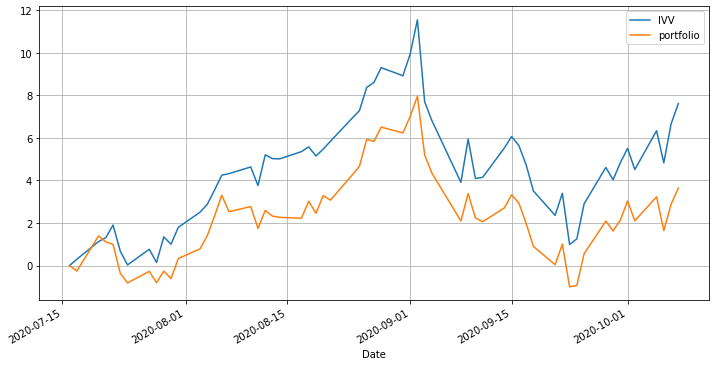

In [9]:
data_closing_change.plot(y=['IVV', 'portfolio'], figsize=(12, 6), grid=True)

In [10]:
data_closing_window = data_closing

data_closing_window

,AMZN,UAL,FB,MCHI,XOM,VCSH,USO,MSFT,IVV,UBER,...,SLQD,VNQ,BA,SPXL,AAL,DAL,SMH,AAPL,CASH,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-03,2478.399902,33.650002,230.160004,64.090919,48.287392,81.492645,27.120001,184.913010,310.684265,36.750000,...,51.463688,80.984253,173.160004,43.753078,11.850000,28.469999,147.550003,81.133713,1,347361.796118
2020-06-04,2460.600098,39.099998,226.289993,63.373596,48.150097,81.433067,27.500000,182.478882,309.643311,36.430000,...,51.523239,80.178535,184.300003,43.383476,16.719999,32.380001,149.179993,80.434975,1,349674.297813
2020-06-05,2483.000000,42.410000,230.770004,64.459541,52.053104,81.552216,28.870001,186.748566,317.713074,37.209999,...,51.453762,83.214714,205.429993,46.719898,18.590000,34.160000,152.699997,82.725845,1,357583.894985
2020-06-08,2524.060059,48.689999,231.399994,64.280212,53.680988,81.582001,28.370001,187.905777,321.599182,37.080002,...,51.483540,85.278130,230.500000,48.428062,20.309999,36.970001,152.240005,83.214958,1,363469.365540
2020-06-09,2600.860107,44.639999,238.669998,64.200516,52.484589,81.582001,28.420000,189.342300,319.229858,36.590000,...,51.533161,83.863213,216.740005,47.369198,18.549999,34.169998,152.520004,85.842720,1,361919.778275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,3125.000000,36.009998,259.940002,73.989998,32.980000,82.790001,26.350000,206.190002,335.049988,37.720001,...,52.029999,81.930000,168.080002,52.180000,13.000000,31.750000,173.149994,113.019997,1,367369.999096
2020-10-05,3199.199951,36.200001,264.649994,74.389999,33.740002,82.779999,27.930000,210.380005,340.899994,37.139999,...,52.040001,82.400002,171.199997,54.849998,13.120000,32.000000,179.050003,116.500000,1,371441.638233
2020-10-06,3099.959961,34.880001,258.660004,75.040001,33.389999,82.779999,28.389999,205.910004,336.059998,36.259998,...,52.049999,81.860001,159.539993,52.560001,12.530000,31.059999,177.479996,113.160004,1,365705.347723


In [11]:
data_pct_change = data_closing.pct_change()
data_pct_change

,AMZN,UAL,FB,MCHI,XOM,VCSH,USO,MSFT,IVV,UBER,...,SLQD,VNQ,BA,SPXL,AAL,DAL,SMH,AAPL,CASH,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,-0.007182,0.161961,-0.016814,-0.011192,-0.002843,-0.000731,0.014012,-0.013164,-0.003351,-0.008707,...,0.001157,-0.009949,0.064334,-0.008447,0.410970,0.137338,0.011047,-0.008612,0.0,0.006657
2020-06-05,0.009103,0.084655,0.019798,0.017136,0.081059,0.001463,0.049818,0.023398,0.026061,0.021411,...,-0.001348,0.037868,0.114650,0.076905,0.111842,0.054972,0.023596,0.028481,0.0,0.022620
2020-06-08,0.016536,0.148078,0.002730,-0.002782,0.031274,0.000365,-0.017319,0.006197,0.012232,-0.003494,...,0.000579,0.024796,0.122037,0.036562,0.092523,0.082260,-0.003012,0.005912,0.0,0.016459
2020-06-09,0.030427,-0.083179,0.031417,-0.001240,-0.022287,0.000000,0.001762,0.007645,-0.007367,-0.013215,...,0.000964,-0.016592,-0.059696,-0.021865,-0.086657,-0.075737,0.001839,0.031578,0.0,-0.004263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-02,-0.029883,0.023593,-0.025091,-0.011490,-0.004528,0.000242,-0.042166,-0.029511,-0.009431,0.015617,...,0.000192,0.017258,0.001311,-0.026856,0.033386,0.020900,-0.029972,-0.032280,0.0,-0.009034
2020-10-05,0.023744,0.005276,0.018120,0.005406,0.023044,-0.000121,0.059962,0.020321,0.017460,-0.015377,...,0.000192,0.005737,0.018563,0.051169,0.009231,0.007874,0.034075,0.030791,0.0,0.011083
2020-10-06,-0.031020,-0.036464,-0.022634,0.008738,-0.010374,0.000000,0.016470,-0.021247,-0.014198,-0.023694,...,0.000192,-0.006553,-0.068107,-0.041750,-0.044970,-0.029375,-0.008769,-0.028669,0.0,-0.015443


<AxesSubplot:xlabel='IVV'>

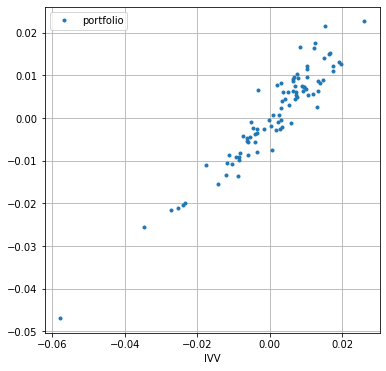

In [12]:
data_pct_change.tail(365).plot(y='portfolio', x='IVV', style='.', figsize=(6,6), grid=True)

In [13]:
data_new = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = 'SPY, BND, AMZN',

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "30y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data_closing_new = data_new.xs('Close',level = 1, axis = 1)

[*********************100%***********************]  3 of 3 completed


In [14]:
data_closing_new['date'] = data_closing_new.index
data_closing_new['year'] = data_closing_new['date'].dt.year
data_closing_new['month'] = data_closing_new['date'].dt.month
data_closing_new['day'] = data_closing_new['date'].dt.day
data_closing_new['dayofweek'] = data_closing_new['date'].dt.dayofweek
data_closing_new['SPY_Y'] = data_closing_new['SPY'].shift(-1)
data_final = data_closing_new[['SPY', 'dayofweek', 'month', 'day', 'year', 'SPY_Y']].dropna()
data_final

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,SPY,dayofweek,month,day,year,SPY_Y
Date,,,,,,
1993-01-29,26.079659,4,1,29,1993,26.265144
1993-02-01,26.265144,0,2,1,1993,26.320782
1993-02-02,26.320782,1,2,2,1993,26.599014
1993-02-03,26.599014,2,2,3,1993,26.710312
1993-02-04,26.710312,3,2,4,1993,26.691771
...,...,...,...,...,...,...
2020-10-01,337.040009,3,10,1,2020,333.839996
2020-10-02,333.839996,4,10,2,2020,339.760010
2020-10-05,339.760010,0,10,5,2020,334.929993


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
x = []
y = []
input_length = 365
for i in range(len(data_final)-input_length):
    temp = data_final[i:input_length+i]
    spy = temp['SPY'].tolist()
#     bnd = temp['BND'].tolist()
    x.append(spy)
#              + temp.tail(1)['dayofweek'].tolist() + temp.tail(1)['month'].tolist() +
#              temp.tail(1)['day'].tolist() + temp.tail(1)['year'].tolist())
    y.append(temp.tail(1)['SPY_Y'].tolist())

In [17]:
# slice_index = int(len(x)*0.9)

# x_train = x[0:slice_index]
# y_train = y[0:slice_index]

# x_test = x[slice_index:len(x)]
# y_test = y[slice_index:len(y)]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(len(x_train), len(y_train), len(x_test), len(y_test))

4956 4956 1653 1653


In [18]:
i=1
print(x_train[i][input_length-1], y_train[i], x_test[i][input_length-1], y_test[i])

87.98324584960938 [88.4328384399414] 41.939918518066406 [40.58187484741211]


In [19]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=0)

In [20]:
top_idx = np.argsort(reg.feature_importances_)[-10:]
print(top_idx)

[328 311 164 294 318 363 245  72 207 364]


In [21]:
reg.score(x_test, y_test)

0.9993272689893212

In [22]:
predictions = reg.predict(x_test)

In [23]:
i = 9
print(predictions[i], y_test[i], x_test[i][input_length-1])

43.26612249298541 [43.7711296081543] 43.35991287231445
